In [239]:
import pandas as pd

In [342]:
table_years = range(10,15)
table_years_2 = range(7,10)
list_of_files = ['~/desktop/acs_data/ACS_{}_1YR_S0501_with_ann.csv'.format(i) for i in table_years]
list_of_files_2 = ['~/desktop/acs_data/ACS_0{}_1YR_S0501_with_ann.csv'.format(i) for i in table_years_2]
file06 = ['~/desktop/acs_data/ACS_06_EST_S0501_with_ann.csv']

In [343]:
list_all_years = list_of_files + file06 + list_of_files_2

In [344]:
list_all_years

['~/desktop/acs_data/ACS_10_1YR_S0501_with_ann.csv',
 '~/desktop/acs_data/ACS_11_1YR_S0501_with_ann.csv',
 '~/desktop/acs_data/ACS_12_1YR_S0501_with_ann.csv',
 '~/desktop/acs_data/ACS_13_1YR_S0501_with_ann.csv',
 '~/desktop/acs_data/ACS_14_1YR_S0501_with_ann.csv',
 '~/desktop/acs_data/ACS_06_EST_S0501_with_ann.csv',
 '~/desktop/acs_data/ACS_07_1YR_S0501_with_ann.csv',
 '~/desktop/acs_data/ACS_08_1YR_S0501_with_ann.csv',
 '~/desktop/acs_data/ACS_09_1YR_S0501_with_ann.csv']

In [352]:
df_06_109 = pd.read_csv(list_all_years[5], index_col = 'Id', header = 1)
df_07_110 = pd.read_csv(list_all_years[6], index_col = 'Id', header = 1)
df_08_110 = pd.read_csv(list_all_years[7], index_col = 'Id', header = 1)
df_09_111 = pd.read_csv(list_all_years[8], index_col = 'Id', header = 1)
df_10_111 = pd.read_csv(list_all_years[0], index_col = 'Id', header = 1)
df_11_112 = pd.read_csv(list_all_years[1], index_col = 'Id', header = 1)
df_12_113 = pd.read_csv(list_all_years[2], index_col = 'Id', header = 1)
df_13_113 = pd.read_csv(list_all_years[3], index_col = 'Id', header = 1)
df_14_114 = pd.read_csv(list_all_years[4], index_col = 'Id', header = 1)



In [427]:
databases = [df_14_114, df_13_113, df_12_113, df_11_112, df_10_111, df_09_111, df_08_110, df_07_110,
            df_06_109]

In [430]:
df_06_109['congress'] = 109
df_08_110['congress'] = 110
df_07_110['congress'] = 110
df_09_111['congress'] = 111
df_10_111['congress'] = 111
df_11_112['congress'] = 112
df_12_113['congress'] = 113
df_13_113['congress'] = 113
df_14_114['congress'] = 114

In [360]:
df_06_109['year'] = 2006
df_08_110['year'] = 2008
df_07_110['year'] = 2007
df_09_111['year'] = 2009
df_10_111['year'] = 2010
df_11_112['year'] = 2011
df_12_113['year'] = 2012
df_13_113['year'] = 2013
df_14_114['year'] = 2014

In [431]:
#stripping out state and district

def district(y):
    if 'at Large' in y:
        return 'NA'
    else:
        return str(y).split()[2]

def state(y):
    if 'at Large' in y:
        return str(y).split()[6]
    else:
        return str(y).split()[5]
    

for db in databases:
    db['district'] = db.Geography.apply(district)
    
for db in databases:
    db['state'] = db.Geography.apply(state)


In [432]:
import pickle

In [682]:
with open("df_politifact.pkl", 'rb') as politifactpickl: 
    politifact_df = pickle.load(politifactpickl)

In [683]:
politifact_df['party'] =  politifact_df['party'].map(lambda d : d.get('party'))


In [684]:
politifact_df['year'] = politifact_df['statement_date'].map(lambda d : d)

In [685]:
type(politifact_df['statement_date'][1])

str

In [686]:
politifact_df['statement_date'] = pd.to_datetime(politifact_df['statement_date'])
politifact_df['year'] = politifact_df['statement_date'].apply(lambda x: x.year)

In [687]:
#turning years into congressional term
def term(year):
    if year['year'] == 2014:
        return 114
    if year['year'] == 2013 or 2012:
        return 113
    if year['year'] == 2011:
        return 112
    if year['year'] == 2010 or 2009:
        return 111
    if year['year'] == 2008 or 2007:
        return 110
    if year['year'] == 2006:
        return 109
politifact_df['congress'] = politifact_df.apply(term, axis=1)

    
    
# df_06_109['congress'] = 109
# df_08_110['congress'] = 110
# df_07_110['congress'] = 110
# df_09_111['congress'] = 111
# df_10_111['congress'] = 111
# df_11_112['congress'] = 112
# df_12_113['congress'] = 113
# df_13_113['congress'] = 113
# df_14_114['congress'] = 114

In [688]:
politifact_df.head()

,ruling,statement_date,name,party,year,congress
0,Pants on Fire!,2014-02-23,Richard Durbin,Democrat,2014,114
1,Half-True,2013-06-25,Richard Durbin,Democrat,2013,113
2,False,2010-06-22,Richard Durbin,Democrat,2010,113
3,False,2010-03-24,Richard Durbin,Democrat,2010,113
4,True,2009-05-20,Richard Durbin,Democrat,2009,113


In [770]:
with open("congressframe_1.pkl", 'rb') as congressframepkl: 
    congressframe = pickle.load(congressframepkl)
    
    
with open("senateframe_1.pkl", 'rb') as senateframepkl: 
    senateframe = pickle.load(senateframepkl)

In [771]:
congressframe['area'] = congressframe['area'].astype(str)

In [772]:
def state_(y):
    state = str(y).split()
    if state[0] == "West":
        return state[0]+ ' ' + state[1]
    if state[0] == "South":
        return state[0]+ ' ' + state[1]
    if state[0] == "North":
        return state[0]+ ' ' + state[1]
    if state[0] == "New":
        return state[0]+ ' ' + state[1]
    else:
        return state[0]
        print(state)

    

congressframe['state'] = congressframe['area'].apply(state_)

In [773]:
def district_(y):
    district = str(y).split()
    if len(district) < 4:
        return district[0]
    else:
        if district[0] == "West":
            return str(district[2])
        if district[0] == "North":
            return str(district[2])
        if district[0] == "South":
            return str(district[2])
        if district[0] == "New":
            return str(district[2])
        if district[0] != "New" or "West" or "North" or "South":
            return district[1]
        else:
            return 'NA'

    
congressframe['district'] = congressframe['area'].apply(district_)


In [774]:
congressframe['state'] = congressframe['state'].str.strip("'s")

In [775]:
congressframe['district'] = congressframe['district'].str.strip("th")
congressframe['district'] = congressframe['district'].str.strip("st")
congressframe['district'] = congressframe['district'].str.strip("rd")
congressframe['district'] = congressframe['district'].str.strip("nd")
congressframe.rename(columns={'term': 'congress'}, inplace=True)
congressframe.rename(columns={'name ': 'name'}, inplace = True)
congressframe.rename(columns=lambda x: x.strip())
senateframe.rename(columns=lambda x: x.strip())

,name,group,area,chamber,term,start_date,end_date,gender
0,Arlen Specter,Republican,Pennsylvania,Senate,108,NaN,NaN,male
1,Barbara A. Mikulski,Democrat,Maryland,Senate,108,NaN,NaN,female
2,Barbara Boxer,Democrat,California,Senate,108,NaN,NaN,female
3,Ben Campbell,Republican,Colorado,Senate,108,NaN,NaN,male
4,Ben Nelson,Democrat,Nebraska,Senate,108,NaN,NaN,male
5,Bill Frist,Republican,Tennessee,Senate,108,NaN,NaN,male
6,Bill Nelson,Democrat,Florida,Senate,108,NaN,NaN,male
7,Blanche Lincoln,Democrat,Arkansas,Senate,108,NaN,NaN,female
8,Bob Graham,Democrat,Florida,Senate,108,NaN,NaN,male
9,Byron Dorgan,Democrat,North Dakota,Senate,108,NaN,NaN,male


In [639]:
district_("Wyoming")

'Wyoming'

In [776]:
congressframe.head()

,name,group,area,chamber,congress,start_date,end_date,gender,state,district
0,Adam B. Schiff,Democrat,California's 29th congressional district,House of Representatives,108,2003-01-07,NaN,male,California,29
1,Adam Putnam,Republican,Florida's 12th congressional district,House of Representatives,108,2003-01-07,NaN,male,Florida,12
2,Adam Smith,Democrat,Washington's 9th congressional district,House of Representatives,108,2003-01-07,NaN,male,Washington,9
3,Alan Mollohan,Democrat,West Virginia's 1st congressional district,House of Representatives,108,2003-01-07,NaN,male,West Virginia,1
4,Albert Wynn,Democrat,Maryland's 4th congressional district,House of Representatives,108,2003-01-07,NaN,male,Maryland,4


In [777]:
senateframe.head()

,name,group,area,chamber,term,start_date,end_date,gender
0,Arlen Specter,Republican,Pennsylvania,Senate,108,NaN,NaN,male
1,Barbara A. Mikulski,Democrat,Maryland,Senate,108,NaN,NaN,female
2,Barbara Boxer,Democrat,California,Senate,108,NaN,NaN,female
3,Ben Campbell,Republican,Colorado,Senate,108,NaN,NaN,male
4,Ben Nelson,Democrat,Nebraska,Senate,108,NaN,NaN,male


In [778]:
senateframe.rename(columns={'term': 'congress'}, inplace=True)

In [779]:
with open('out.pkl', 'rb') as outpkl:
    name_matches = pickle.load(outpkl)

In [780]:
name_matches.rename(columns={'using_original':'name'}, inplace = True)

In [781]:
#congress_match = pd.concat([congressframe, name_matches], axis = 1)
congress_match = congressframe.merge(name_matches, on = 'name')
senate_match = senateframe.merge(name_matches, on = 'name')

In [782]:
def fuzzratio(row):
    try: #avoid errors for example on NaN's
        return fuzz.ratio(row['name'], row['Match1'])
    except:
        return 0. #you'll want to expiriment w/o the try/except too
senate_match['ratio'] = senate_match.apply(fuzzratio, axis = 1) #create ratio column by applying function
congress_match['ratio'] = congress_match.apply(fuzzratio, axis = 1)

In [783]:
congress_match.head(50)

,name,group,area,chamber,congress,start_date,end_date,gender,state,district,Match1,ratio
0,Adam B. Schiff,Democrat,California's 29th congressional district,House of Representatives,108,2003-01-07,NaN,male,California,29,Susan B. Anthony List,39
1,Adam B. Schiff,Democrat,California's 29th congressional district,House of Representatives,109,NaN,NaN,male,California,29,Susan B. Anthony List,39
2,Adam B. Schiff,Democrat,California's 29th congressional district,House of Representatives,110,NaN,NaN,male,California,29,Susan B. Anthony List,39
3,Adam B. Schiff,Democrat,California's 29th congressional district,House of Representatives,111,NaN,NaN,male,California,29,Susan B. Anthony List,39
4,Adam B. Schiff,Democrat,California's 29th congressional district,House of Representatives,112,NaN,NaN,male,California,29,Susan B. Anthony List,39
5,Adam B. Schiff,Democrat,California's 28th congressional district,House of Representatives,113,NaN,NaN,male,California,28,Susan B. Anthony List,39
6,Adam B. Schiff,Democrat,California's 28th congressional district,House of Representatives,114,NaN,NaN,male,California,28,Susan B. Anthony List,39
7,Adam Putnam,Republican,Florida's 12th congressional district,House of Representatives,108,2003-01-07,NaN,male,Florida,12,Adam Putnam,100
8,Adam Putnam,Republican,Florida's 12th congressional district,House of Representatives,109,NaN,NaN,male,Florida,12,Adam Putnam,100
9,Adam Putnam,Republican,Florida's 12th congressional district,House of Representatives,110,NaN,NaN,male,Florida,12,Adam Putnam,100


In [784]:
def name_replace(row):
    if row['ratio'] >= 90:
        return row['Match1']
    else:
        return row['name']

In [785]:
congress_match['name_'] = congress_match.apply(name_replace, axis = 1)
senate_match['name_'] = senate_match.apply(name_replace, axis = 1)

In [786]:
del senate_match['name']
del congress_match['name']

In [787]:
politifact_df.head()

,ruling,statement_date,name,party,year,congress
0,Pants on Fire!,2014-02-23,Richard Durbin,Democrat,2014,114
1,Half-True,2013-06-25,Richard Durbin,Democrat,2013,113
2,False,2010-06-22,Richard Durbin,Democrat,2010,113
3,False,2010-03-24,Richard Durbin,Democrat,2010,113
4,True,2009-05-20,Richard Durbin,Democrat,2009,113


In [788]:
senateframe.rename(columns={'name_': 'name'}, inplace=True)
congressframe.rename(columns={'name_': 'name'}, inplace=True)

In [854]:
senate_politifact = senateframe.merge(politifact_df, on = ['name', 'congress'])

In [855]:
len(senate_politifact)

460

In [856]:
senate_politifact

,name,group,area,chamber,congress,start_date,end_date,gender,ruling,statement_date,party,year
0,Amy Klobuchar,Democrat,Minnesota,Senate,113,NaN,NaN,female,True,2015-01-04,Democrat,2015
1,Bill Nelson,Democrat,Florida,Senate,113,NaN,NaN,male,Half-True,2013-02-21,Democrat,2013
2,Bill Nelson,Democrat,Florida,Senate,113,NaN,NaN,male,Mostly True,2009-06-15,Democrat,2009
3,Bob Corker,Republican,Tennessee,Senate,113,NaN,NaN,male,Mostly False,2013-11-24,Republican,2013
4,Bob Corker,Republican,Tennessee,Senate,113,NaN,NaN,male,Mostly True,2010-04-25,Republican,2010
5,Carl Levin,Democrat,Michigan,Senate,113,NaN,NaN,male,True,2009-10-11,Democrat,2009
6,Chuck Grassley,Republican,Iowa,Senate,113,NaN,NaN,male,False,2013-06-03,Republican,2013
7,Chuck Grassley,Republican,Iowa,Senate,113,NaN,NaN,male,True,2009-12-30,Republican,2009
8,Chuck Grassley,Republican,Iowa,Senate,113,NaN,NaN,male,Half-True,2009-06-28,Republican,2009
9,Chuck Grassley,Republican,Iowa,Senate,113,NaN,NaN,male,Half-True,2009-03-16,Republican,2009


In [857]:
congress_politifact = congressframe.merge(politifact_df, on = ['name', 'congress'])

In [858]:
len(congress_politifact)

210

In [859]:
senate_politifact.rename(columns={'area': 'state'}, inplace=True)

In [860]:

def s_state(y):
    if y['state'] == "Illinoi":
        return 'Illinois'
    if y['state'] == "Texa":
        return 'Texas'
    if y['state'] == "District":
        return 'District of Columbia'
    if y['state'] == 'Arkansa':
        return 'Arkansas'
    if y['state'] == 'Kansa':
        return 'Kansas'
    else:
        return y['state']
    
congress_politifact['state'] = congress_politifact.apply(s_state, axis = 1)

In [861]:
    congress_politifact

,name,group,area,chamber,congress,start_date,end_date,gender,state,district,ruling,statement_date,party,year
0,Adam Kinzinger,Republican,Illinois's 16th congressional district,House of Representatives,113,NaN,NaN,male,Illinois,16,False,2015-02-15,Republican,2015
1,Adam Kinzinger,Republican,Illinois's 16th congressional district,House of Representatives,113,NaN,NaN,male,Illinois,16,Half-True,2010-09-21,Republican,2010
2,Adam Kinzinger,Republican,Illinois's 16th congressional district,House of Representatives,113,NaN,NaN,male,Illinois,16,Half-True,2010-09-21,Republican,2010
3,Alan Grayson,Democrat,Florida's 9th congressional district,House of Representatives,113,NaN,NaN,male,Florida,9,Pants on Fire!,2015-11-25,Democrat,2015
4,Alan Grayson,Democrat,Florida's 9th congressional district,House of Representatives,113,NaN,NaN,male,Florida,9,Mostly False,2013-09-07,Democrat,2013
5,Alan Grayson,Democrat,Florida's 9th congressional district,House of Representatives,113,NaN,NaN,male,Florida,9,False,2013-05-21,Democrat,2013
6,Alan Grayson,Democrat,Florida's 9th congressional district,House of Representatives,113,NaN,NaN,male,Florida,9,Mostly True,2012-11-24,Democrat,2012
7,Alan Grayson,Democrat,Florida's 9th congressional district,House of Representatives,113,NaN,NaN,male,Florida,9,Mostly True,2010-03-03,Democrat,2010
8,Alan Grayson,Democrat,Florida's 9th congressional district,House of Representatives,113,NaN,NaN,male,Florida,9,Mostly False,2009-11-30,Democrat,2009
9,Ami Bera,Democrat,California's 7th congressional district,House of Representatives,113,NaN,NaN,male,California,7,Mostly False,2013-02-26,Democrat,2013


In [862]:
print(congress_politifact['year'].value_counts())

2011    63
2013    51
2009    28
2010    25
2014    21
2015    12
2012     4
2007     4
2016     2
Name: year, dtype: int64


In [863]:
len(congress_politifact)

210

In [864]:
senate_politifact

,name,group,state,chamber,congress,start_date,end_date,gender,ruling,statement_date,party,year
0,Amy Klobuchar,Democrat,Minnesota,Senate,113,NaN,NaN,female,True,2015-01-04,Democrat,2015
1,Bill Nelson,Democrat,Florida,Senate,113,NaN,NaN,male,Half-True,2013-02-21,Democrat,2013
2,Bill Nelson,Democrat,Florida,Senate,113,NaN,NaN,male,Mostly True,2009-06-15,Democrat,2009
3,Bob Corker,Republican,Tennessee,Senate,113,NaN,NaN,male,Mostly False,2013-11-24,Republican,2013
4,Bob Corker,Republican,Tennessee,Senate,113,NaN,NaN,male,Mostly True,2010-04-25,Republican,2010
5,Carl Levin,Democrat,Michigan,Senate,113,NaN,NaN,male,True,2009-10-11,Democrat,2009
6,Chuck Grassley,Republican,Iowa,Senate,113,NaN,NaN,male,False,2013-06-03,Republican,2013
7,Chuck Grassley,Republican,Iowa,Senate,113,NaN,NaN,male,True,2009-12-30,Republican,2009
8,Chuck Grassley,Republican,Iowa,Senate,113,NaN,NaN,male,Half-True,2009-06-28,Republican,2009
9,Chuck Grassley,Republican,Iowa,Senate,113,NaN,NaN,male,Half-True,2009-03-16,Republican,2009


In [868]:
congress_politifact.sort('year')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,name,group,area,chamber,congress,start_date,end_date,gender,state,district,ruling,statement_date,party,year
47,Duncan Hunter,Republican,California's 50th congressional district,House of Representatives,113,NaN,NaN,male,California,50,False,2007-10-31,Republican,2007
48,Duncan Hunter,Republican,California's 50th congressional district,House of Representatives,113,NaN,NaN,male,California,50,True,2007-08-05,Republican,2007
49,Duncan Hunter,Republican,California's 50th congressional district,House of Representatives,113,NaN,NaN,male,California,50,True,2007-09-05,Republican,2007
50,Duncan Hunter,Republican,California's 50th congressional district,House of Representatives,113,NaN,NaN,male,California,50,Mostly True,2007-09-05,Republican,2007
46,Duncan Hunter,Republican,California's 50th congressional district,House of Representatives,113,NaN,NaN,male,California,50,Mostly True,2009-08-31,Republican,2009
91,Mark Sanford,Republican,South Carolina's 1st congressional district,House of Representatives,113,2013-05-15,NaN,male,South Carolina,1,False,2009-02-23,Republican,2009
160,Steve King,Republican,Iowa's 4th congressional district,House of Representatives,113,NaN,NaN,male,Iowa,4,Pants on Fire!,2009-05-06,Republican,2009
57,Eric Cantor,Republican,Virginia's 7th congressional district,House of Representatives,113,NaN,2014-08-18,male,Virginia,7,Mostly False,2009-07-08,Republican,2009
58,Eric Cantor,Republican,Virginia's 7th congressional district,House of Representatives,113,NaN,2014-08-18,male,Virginia,7,False,2009-01-23,Republican,2009
59,Eric Cantor,Republican,Virginia's 7th congressional district,House of Representatives,113,NaN,2014-08-18,male,Virginia,7,Pants on Fire!,2009-01-23,Republican,2009


In [866]:
len(senate_politifact)

460

In [867]:
senate_politifact.sort('year')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,name,group,state,chamber,congress,start_date,end_date,gender,ruling,statement_date,party,year
46,Harry Reid,Democrat,Nevada,Senate,113,NaN,NaN,male,Full Flop,2008-12-30,Democrat,2008
105,John McCain,Republican,Arizona,Senate,113,NaN,NaN,male,True,2008-10-07,Republican,2008
106,John McCain,Republican,Arizona,Senate,113,NaN,NaN,male,False,2008-10-01,Republican,2008
107,John McCain,Republican,Arizona,Senate,113,NaN,NaN,male,Half-True,2008-09-30,Republican,2008
108,John McCain,Republican,Arizona,Senate,113,NaN,NaN,male,True,2008-09-26,Republican,2008
109,John McCain,Republican,Arizona,Senate,113,NaN,NaN,male,Mostly False,2008-09-26,Republican,2008
110,John McCain,Republican,Arizona,Senate,113,NaN,NaN,male,False,2008-09-26,Republican,2008
111,John McCain,Republican,Arizona,Senate,113,NaN,NaN,male,Mostly True,2008-09-26,Republican,2008
112,John McCain,Republican,Arizona,Senate,113,NaN,NaN,male,Mostly False,2008-09-26,Republican,2008
113,John McCain,Republican,Arizona,Senate,113,NaN,NaN,male,Mostly False,2008-09-26,Republican,2008


In [893]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

In [894]:
with open('senate_politifact.pkl', 'wb') as senatepolipkl:
    pickle.dump(senate_politifact, senatepolipkl)
    
with open('congress_politifact.pkl', 'wb') as congresspolipkl:
    pickle.dump(congress_politifact, congresspolipkl)

In [876]:
print(senate_politifact['ruling'].value_counts())

Mostly False      105
False              90
Mostly True        88
Half-True          84
True               58
Pants on Fire!     22
Full Flop           9
Half Flip           2
No Flip             2
Name: ruling, dtype: int64


In [887]:
print(congress_politifact['ruling'].value_counts())

False             56
Mostly True       36
Mostly False      33
Half-True         30
True              28
Pants on Fire!    27
Name: ruling, dtype: int64


In [889]:
print(senate_politifact['group'].value_counts())

Republican    399
Democrat       61
Name: group, dtype: int64


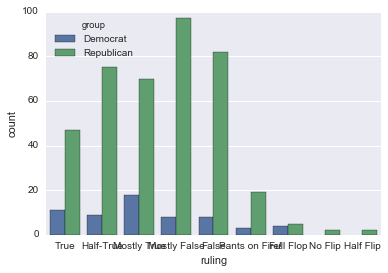

In [892]:
ax = sns.countplot(x="ruling", hue="group", data=senate_politifact)

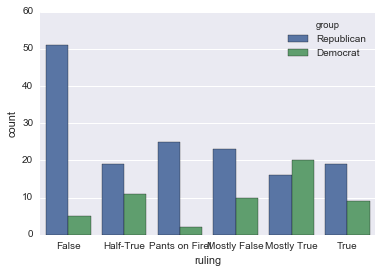

In [895]:
ax = sns.countplot(x="ruling", hue="group", data=congress_politifact)

In [295]:
df2006col = ['Total; Estimate; Total population - SUMMARY INDICATORS - Median age (years)', 
             'Total; Estimate; Total population - RACE AND HISPANIC OR LATINO ORIGIN - One race - White',
             "Total; Estimate; Total population - EDUCATIONAL ATTAINMENT - Some college or associate's degree", 
             'Total; Estimate; Total population - Median earnings (dollars) for full-time, year-round workers: - Male', 
             'Total; Estimate; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Unemployed', 
             'Total; Estimate; LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH - Population 5 years and over - English only - Language other than English', 
             'Total; Estimate; Total population - SEX AND AGE - Male', 
             "*Total; Estimate; Percent bachelor's degree or higher", 
             'Total; Estimate; Total population - MARITAL STATUS - Population 15 years and over - Widowed', 
             'Total; Estimate; Total population - EDUCATIONAL ATTAINMENT - Graduate or professional degree', 
             "Female; Estimate; Total population - Percent bachelor's degree or higher",  
             'Total; Estimate; Total population - SEX AND AGE - Female', 
             'Male; Estimate; Total population - SELECTED AGE CATEGORIES - 65 years and over', 
             'Foreign born; Estimate; Total population - SEX AND AGE - Female', 
             'Total; Estimate; Total population - MARITAL STATUS - Population 15 years and over - Divorced or separated', 
             'Total; Estimate; Total population - RACE AND HISPANIC OR LATINO ORIGIN - One race - Asian', 
             'Total; Estimate; Total population - RACE AND HISPANIC OR LATINO ORIGIN - One race', 
             'Total; Estimate; Total population - Median Household income (dollars)', 
             'Total; Estimate; Total population - MARITAL STATUS - Population 15 years and over - Never married',
             'Total; Estimate; Total population - Median earnings (dollars) for full-time, year-round workers: - Female', 
             'Total; Estimate; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Employed', 
             'Total; Estimate; Total population - SELECTED AGE CATEGORIES - 65 years and over', 
             'Total; Estimate; LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH - Population 5 years and over - English only', 
             'Total; Estimate; Total population - SEX AND AGE - Female', 
             'Foreign born; Estimate; Total population - SEX AND AGE - Male', 
             'Female; Estimate; Total population - SELECTED AGE CATEGORIES - 65 years and over', 
             'Total; Estimate; Total population - RACE AND HISPANIC OR LATINO ORIGIN - One race - Some other race', 
             'Total; Estimate; Total population - EDUCATIONAL ATTAINMENT - High school graduate (includes equivalency)', 
             '*Percent with a disability; Estimate; Total civilian noninstitutionalized population', 
             'Total; Estimate; Total population - EDUCATIONAL ATTAINMENT - Less than high school graduate', 
             'Total; Estimate; Total population - POVERTY STATUS IN THE PAST 12 MONTHS - 100 to 199 percent of the poverty level', 
             'Total; Estimate; EMPLOYMENT STATUS - Population 16 years and over - In labor force', 
             'Total; Estimate; Total population - RACE AND HISPANIC OR LATINO ORIGIN - One race - American Indian and Alaska Native', 
             'Total; Estimate; Total population - SEX AND AGE - Male', 
             'Female; Estimate; Total population - SUMMARY INDICATORS - Median age (years)', 
             'Total; Estimate; Total population - POVERTY STATUS IN THE PAST 12 MONTHS - Below 100 percent of the poverty level', 
             "Total; Estimate; Total population - EDUCATIONAL ATTAINMENT - Bachelor's degree", 
             'Total; Estimate; Total population - RACE AND HISPANIC OR LATINO ORIGIN - One race - Native Hawaiian and Other Pacific Islander', 
             'Total; Estimate; Total population - INCOME IN THE PAST 12 MONTHS (IN 2012 INFLATION-ADJUSTED DOLLARS) - With earnings - Mean earnings (dollars)', 
             "Male; Estimate; Total population - Percent bachelor's degree or higher", 
             'Total; Estimate; Total population - MARITAL STATUS - Now married, except separated', 
             'Total; Estimate; Total population - RACE AND HISPANIC OR LATINO ORIGIN - One race - Black or African American', 
             'Total; Estimate; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Unemployed - Percent of civilian labor force', 
             'Total; Estimate; LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH - English only - Speak English less than "very well"', 
             'Total; Estimate; Total population - POVERTY STATUS IN THE PAST 12 MONTHS - At or above 200 percent of the poverty level', 
             'Total; Estimate; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force', 
             'Male; Estimate; Total population - SUMMARY INDICATORS - Median age (years)']


In [273]:
col0501names= ['Id2', 'Geography', 'Native; Estimate; Total population', 
               'Foreign born; Naturalized citizen; Estimate; Total population', 
               'Foreign born; Not a U.S. citizen; Estimate; Total population',
               'Total; Estimate; SEX AND AGE - Male',
               'Total; Estimate; SEX AND AGE - Female',
               'Native; Estimate; SEX AND AGE - Male',
               'Native; Estimate; SEX AND AGE - Female',
               'Foreign born; Estimate; SEX AND AGE - Male',
               'Foreign born; Estimate; SEX AND AGE - Female',
               'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race',
               'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - White',
               'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Black or African American',
               'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - American Indian and Alaska Native',
               'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Asian',
               'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Native Hawaiian and Other Pacific Islander',
               'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Some other race',
               'Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over',
               'Total; Estimate; EDUCATIONAL ATTAINMENT - Less than high school graduate',
               'Total; Estimate; EDUCATIONAL ATTAINMENT - High school graduate (includes equivalency)',
               "Total; Estimate; EDUCATIONAL ATTAINMENT - Some college or associate's degree",
               "Total; Estimate; EDUCATIONAL ATTAINMENT - Bachelor's degree",
               'Total; Estimate; EDUCATIONAL ATTAINMENT - Graduate or professional degree',
               'Total; Estimate; MARITAL STATUS - Population 15 years and over',
               'Total; Estimate; MARITAL STATUS - Never married',
               'Total; Estimate; MARITAL STATUS - Now married, except separated',
               'Total; Estimate; MARITAL STATUS - Divorced or separated',
               'Total; Estimate; MARITAL STATUS - Widowed',
               'Total; Estimate; LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH - Population 5 years and over',
               'Total; Estimate; LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH - English only',
               'Total; Estimate; LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH - English only - Language other than English',
               'Total; Estimate; LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH - English only - Speak English less than "very well"',
               'Total; Estimate; EMPLOYMENT STATUS - Population 16 years and over',
               'Total; Estimate; EMPLOYMENT STATUS - In labor force',
               'Total; Estimate; EMPLOYMENT STATUS - In labor force - Civilian labor force',
               'Total; Estimate; EMPLOYMENT STATUS - In labor force - Civilian labor force - Employed',
               'Total; Estimate; EMPLOYMENT STATUS - In labor force - Civilian labor force - Unemployed',
               'Total; Estimate; EMPLOYMENT STATUS - In labor force - Civilian labor force - Unemployed - Percent of civilian labor force',
               'Total; Estimate; Median earnings (dollars) for full-time, year-round workers: - Male',
               'Total; Estimate; Median earnings (dollars) for full-time, year-round workers: - Female',
               'Total; Estimate; INCOME IN THE PAST 12 MONTHS (IN 2012 INFLATION-ADJUSTED DOLLARS) - With earnings - Mean earnings (dollars)',
               'Total; Estimate; Median Household income (dollars)',
               'Total; Estimate; POVERTY STATUS IN THE PAST 12 MONTHS - Population for whom poverty status is determined',
               'Total; Estimate; POVERTY STATUS IN THE PAST 12 MONTHS - Below 100 percent of the poverty level',
               'Total; Estimate; POVERTY STATUS IN THE PAST 12 MONTHS - 100 to 199 percent of the poverty level',
               'Total; Estimate; POVERTY STATUS IN THE PAST 12 MONTHS - At or above 200 percent of the poverty level'
               ]

In [274]:
col1501names = ['Id2', 'Geography',
               'Total; Estimate; Population 18 to 24 years',
               'Male; Estimate; Population 18 to 24 years',
               'Female; Estimate; Population 18 to 24 years',
               "Total; Estimate; Percent bachelor's degree or higher",
               "Male; Estimate; Percent bachelor's degree or higher",
               "Female; Estimate; Percent bachelor's degree or higher"]

In [275]:
col1810names = ['Id2', 'Geography',
               'Percent with a disability; Estimate; Total civilian noninstitutionalized population']

In [276]:
col2101names = ['Id2', 'Geography',
               'Total; Estimate; Civilian population 18 years and over',
               'Veterans; Estimate; Civilian population 18 years and over',
               'Nonveterans; Estimate; Civilian population 18 years and over']

In [277]:
col2301names = ['Id2', 'Geography',
               'Unemployment rate; Estimate; Population 16 years and over']

In [278]:
col0101names = ['Id2', 'Geography', 'Total; Estimate; Total population',
          'Male; Estimate; Total population', 'Female; Estimate; Total population',
          'Total; Estimate; SUMMARY INDICATORS - Median age (years)',
          'Male; Estimate; SUMMARY INDICATORS - Median age (years)',
          'Female; Estimate; SUMMARY INDICATORS - Median age (years)',
          'Total; Estimate; PERCENT IMPUTED - Sex',
          'Male; Estimate; PERCENT IMPUTED - Sex',
          'Female; Estimate; PERCENT IMPUTED - Sex',
               'Total; Estimate; SELECTED AGE CATEGORIES - 65 years and over',
               'Male; Estimate; SELECTED AGE CATEGORIES - 65 years and over',
               'Female; Estimate; SELECTED AGE CATEGORIES - 65 years and over']

In [279]:
acs_column_names = col0101names + col0501names + col1501names + col1810names + col2101names + col2301names

In [280]:
acs_column_names_set = list(set(acs_column_names))